In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [2]:
heart_df=pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Check for null values
print(f"No of null vlaues are:{heart_df.isnull().sum().sum()}")

No of null vlaues are:0


In [6]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
cbal=heart_df['target'].value_counts()
cbal

1    526
0    499
Name: target, dtype: int64

In [8]:
print(f"The percentage of people with heart disease: {cbal[1]*100/len(heart_df):.2f}%")
print(f"The percentage of normal people is :{cbal[0]*100/len(heart_df):.2f}%")


The percentage of people with heart disease: 51.32%
The percentage of normal people is :48.68%


<Axes: title={'center': 'HeartDisease'}, xlabel='Disease', ylabel='count'>

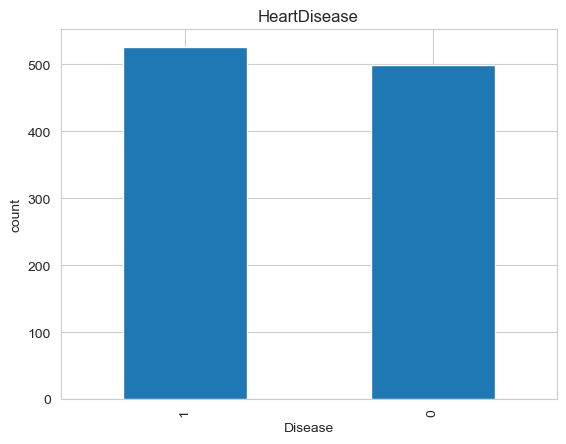

In [9]:
cbal.plot(kind='bar',title='HeartDisease',xlabel='Disease',ylabel='count')

In [10]:
cat_val=[]
cont_val=[]
for col in heart_df.columns:
    if len(heart_df[col].unique())<=9:
        cat_val.append(col)
    else:
        cont_val.append(col)

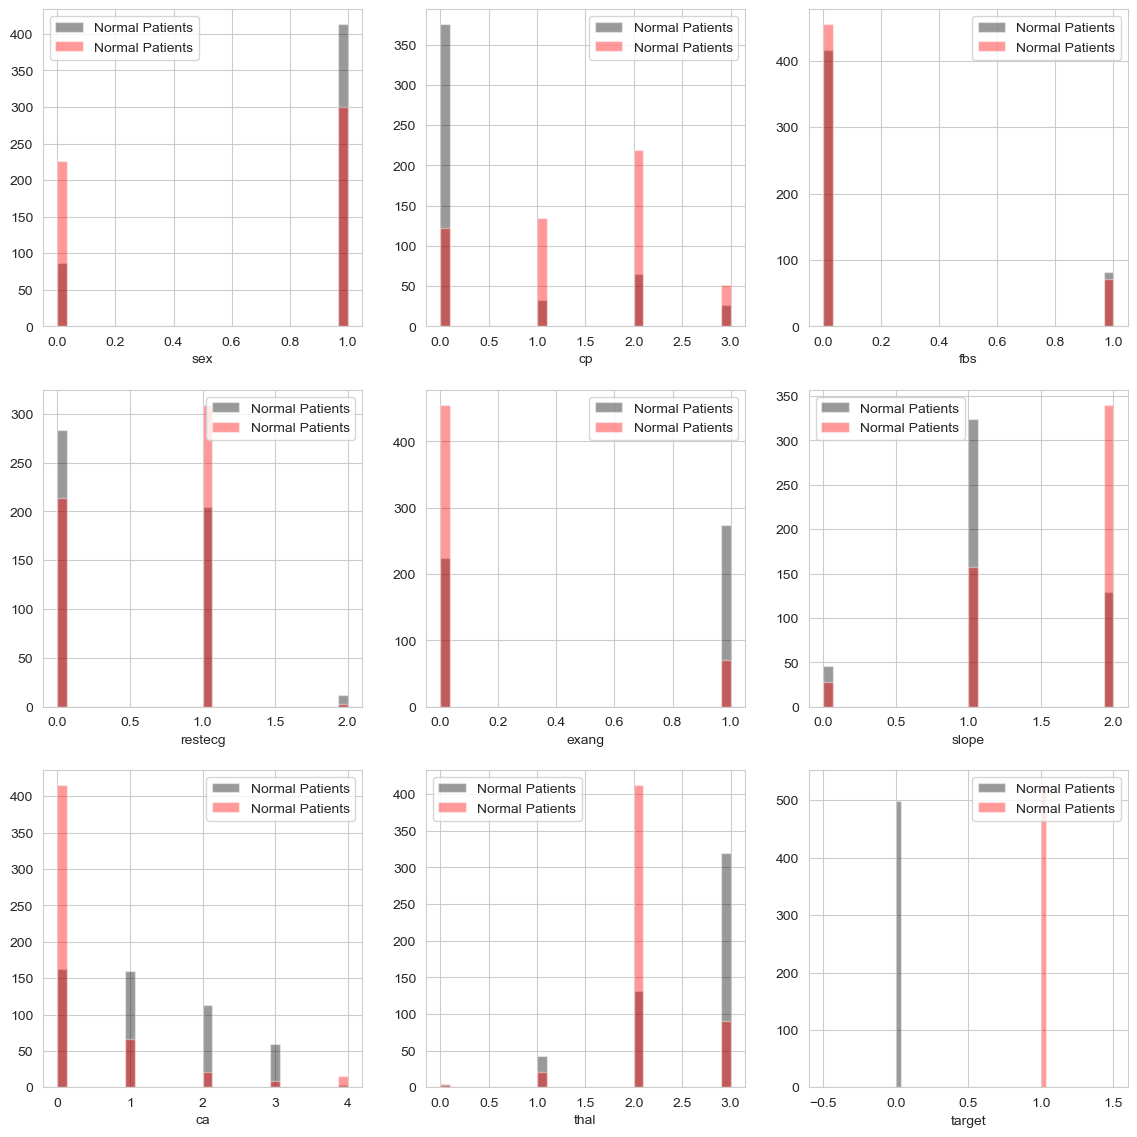

In [11]:
plt.figure(figsize=(14,14))
for i,col in enumerate(cat_val,1):
    plt.subplot(3,3,i)
    heart_df[heart_df['target']==0][col].hist(bins=30,color='black',label='Normal Patients',alpha=0.4)
    heart_df[heart_df['target']==1][col].hist(bins=30,color='red',label='Normal Patients',alpha=0.4)
    plt.legend()
    plt.xlabel(col)

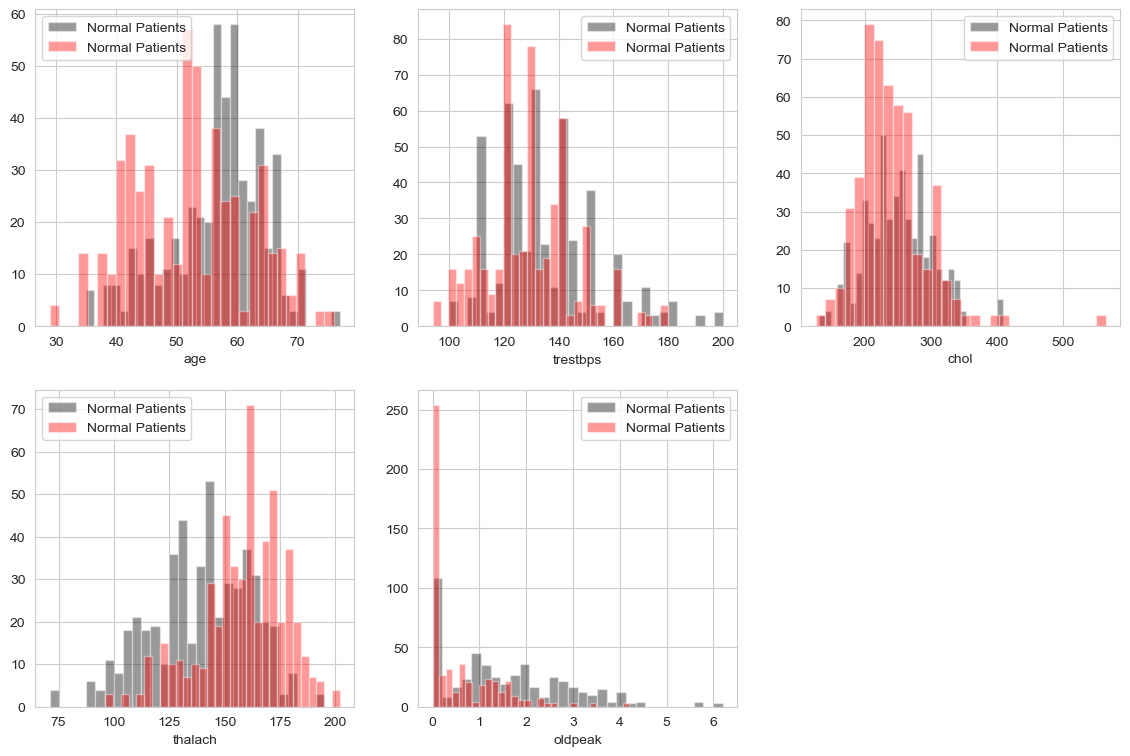

In [12]:
plt.figure(figsize=(14,14))
for i,col in enumerate(cont_val,1):
    plt.subplot(3,3,i)
    heart_df[heart_df['target']==0][col].hist(bins=30,color='black',label='Normal Patients',alpha=0.4)
    heart_df[heart_df['target']==1][col].hist(bins=30,color='red',label='Normal Patients',alpha=0.4)
    plt.legend()
    plt.xlabel(col)

(14.5, -0.5)

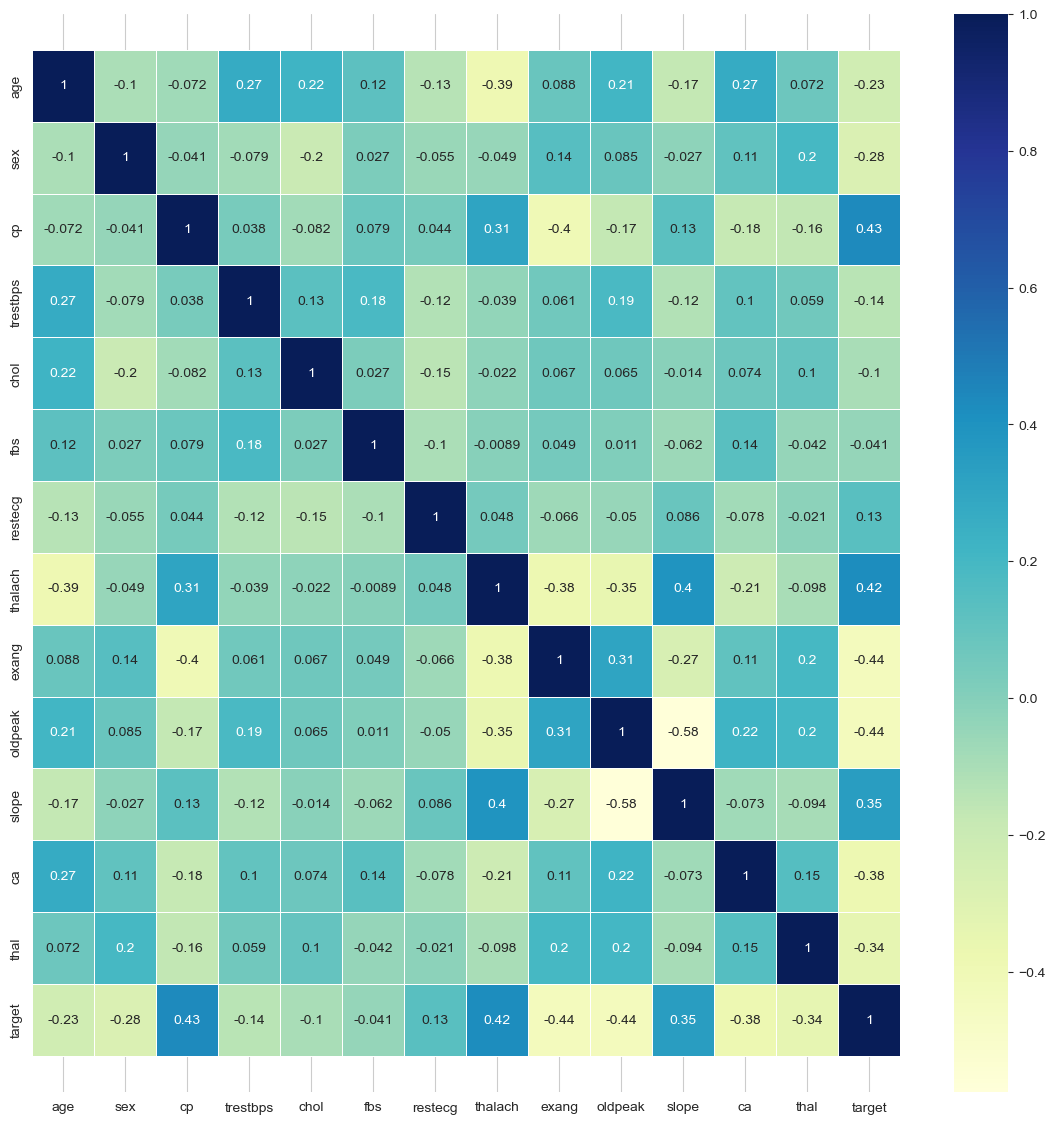

In [13]:
corr_matx=heart_df.corr()
fig,ax=plt.subplots(figsize=(14,14))
ax=sns.heatmap(corr_matx,annot=True,linewidths=0.5,cmap='YlGnBu')
bt, tp=ax.get_ylim()
ax.set_ylim(bt+0.5,tp-0.5)

In [14]:
cat_val.remove('target')
# df_new=pd.get_dummies(heart_df,columns=cat_val)

In [15]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
heart_df.shape

(1025, 14)

In [17]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
# from sklearn.preprocessing import StandardScaler

# sc=StandardScaler()
# heart_df[cont_val]=sc.fit_transform(heart_df[cont_val])

In [19]:
# Metrics for accuracy testing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def acc_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        clfr=pd.DataFrame(classification_report(y_train,y_pred, output_dict=True))
        print(f"Accuracy for train: {accuracy_score(y_train,y_pred)*100:.2f}")
        print()
        print(f"Classification Report:{clfr}")
        print()
        print(f"Confusion Mat: \n {confusion_matrix(y_train,y_pred)}")
    elif train==False:
        y_pred=clf.predict(X_test)
        clfr=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
        print("Result for test data")
        print(f"Accuracy for test: {accuracy_score(y_test,y_pred)*100:.2f}")
        print()
        print(f"Classification Report:{clfr}")
        print()
        print(f"Confusion Mat: \n {confusion_matrix(y_test,y_pred)}")

In [20]:
from sklearn.model_selection import train_test_split

X=heart_df.drop('target',axis=1)
y=heart_df['target']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression

logic=LogisticRegression(solver='liblinear')
logic.fit(X_train,y_train)

acc_score(logic,X_train, X_test, y_train, y_test,train=True)

acc_score(logic,X_train, X_test, y_train, y_test,train=False)



Accuracy for train: 86.89

Classification Report:                    0           1  accuracy   macro avg  weighted avg
precision    0.896774    0.847666  0.868898    0.872220      0.870953
recall       0.817647    0.915119  0.868898    0.866383      0.868898
f1-score     0.855385    0.880102  0.868898    0.867743      0.868381
support    340.000000  377.000000  0.868898  717.000000    717.000000

Confusion Mat: 
 [[278  62]
 [ 32 345]]
Result for test data
Accuracy for test: 81.82

Classification Report:                    0           1  accuracy   macro avg  weighted avg
precision    0.870504    0.775148  0.818182    0.822826      0.824374
recall       0.761006    0.879195  0.818182    0.820100      0.818182
f1-score     0.812081    0.823899  0.818182    0.817990      0.817798
support    159.000000  149.000000  0.818182  308.000000    308.000000

Confusion Mat: 
 [[121  38]
 [ 18 131]]


In [21]:
test= accuracy_score(y_test, logic.predict(X_test)) * 100
train= accuracy_score(y_train, logic.predict(X_train)) * 100

acc_df = pd.DataFrame(data=[["Logistic Regression", train, test]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
acc_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.889819,81.818182


In [22]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)
acc_score(svm,X_train, X_test, y_train, y_test,train=True)

acc_score(svm,X_train, X_test, y_train, y_test,train=False)

Accuracy for train: 100.00

Classification Report:               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0

Confusion Mat: 
 [[340   0]
 [  0 377]]
Result for test data
Accuracy for test: 100.00

Classification Report:               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    159.0  149.0       1.0      308.0         308.0

Confusion Mat: 
 [[159   0]
 [  0 149]]


In [23]:
# accuracy
test= accuracy_score(y_test, svm.predict(X_test)) * 100
train= accuracy_score(y_train, svm.predict(X_train)) * 100

df_2 = pd.DataFrame(data=[["Support Vector Machine", train, test]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
acc_df = acc_df.append(df_2, ignore_index=True)
acc_df

C:\Users\yores\AppData\Local\Temp\ipykernel_45408\3344009141.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_df = acc_df.append(df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.889819,81.818182
1,Support Vector Machine,100.000000,100.000000


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
acc_score(dtc,X_train,X_test,y_train,y_test,train=True)
acc_score(dtc,X_train,X_test,y_train,y_test,train=False)

Accuracy for train: 100.00

Classification Report:               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0

Confusion Mat: 
 [[340   0]
 [  0 377]]
Result for test data
Accuracy for test: 97.08

Classification Report:                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    1.000000  0.970779    0.973214      0.972345
recall       1.000000    0.939597  0.970779    0.969799      0.970779
f1-score     0.972477    0.968858  0.970779    0.970668      0.970726
support    159.000000  149.000000  0.970779  308.000000    308.000000

Confusion Mat: 
 [[159   0]
 [  9 140]]


In [25]:
# accuracy add
test= accuracy_score(y_test, dtc.predict(X_test)) * 100
train= accuracy_score(y_train, dtc.predict(X_train)) * 100

df_2 = pd.DataFrame(data=[["Decision tree Classifier", train, test]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
acc_df = acc_df.append(df_2, ignore_index=True)
acc_df

C:\Users\yores\AppData\Local\Temp\ipykernel_45408\3573145005.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_df = acc_df.append(df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.889819,81.818182
1,Support Vector Machine,100.000000,100.000000
2,Decision tree Classifier,100.000000,97.077922


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

acc_score(rfc,X_train,X_test,y_train,y_test,train=True)
acc_score(rfc,X_train,X_test,y_train,y_test,train=False)

Accuracy for train: 100.00

Classification Report:               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0

Confusion Mat: 
 [[340   0]
 [  0 377]]
Result for test data
Accuracy for test: 99.03

Classification Report:                    0           1  accuracy   macro avg  weighted avg
precision    0.981481    1.000000   0.99026    0.990741      0.990440
recall       1.000000    0.979866   0.99026    0.989933      0.990260
f1-score     0.990654    0.989831   0.99026    0.990242      0.990256
support    159.000000  149.000000   0.99026  308.000000    308.000000

Confusion Mat: 
 [[159   0]
 [  3 146]]


In [27]:
# accuracy add
test= accuracy_score(y_test, rfc.predict(X_test)) * 100
train= accuracy_score(y_train, rfc.predict(X_train)) * 100

df_2 = pd.DataFrame(data=[["Random Forest Classifier", train, test]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
acc_df = acc_df.append(df_2, ignore_index=True)
acc_df

C:\Users\yores\AppData\Local\Temp\ipykernel_45408\837218243.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_df = acc_df.append(df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.889819,81.818182
1,Support Vector Machine,100.000000,100.000000
2,Decision tree Classifier,100.000000,97.077922
3,Random Forest Classifier,100.000000,99.025974


In [28]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False)
xgb.fit(X_train,y_train)

acc_score(xgb,X_train,X_test,y_train,y_test,train=True)
acc_score(xgb,X_train,X_test,y_train,y_test,train=False)

Accuracy for train: 100.00

Classification Report:               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0

Confusion Mat: 
 [[340   0]
 [  0 377]]
Result for test data
Accuracy for test: 99.03

Classification Report:                    0           1  accuracy   macro avg  weighted avg
precision    0.981481    1.000000   0.99026    0.990741      0.990440
recall       1.000000    0.979866   0.99026    0.989933      0.990260
f1-score     0.990654    0.989831   0.99026    0.990242      0.990256
support    159.000000  149.000000   0.99026  308.000000    308.000000

Confusion Mat: 
 [[159   0]
 [  3 146]]


c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [29]:
# accuracy
test= accuracy_score(y_test, xgb.predict(X_test)) * 100
train= accuracy_score(y_train, xgb.predict(X_train)) * 100

df_2 = pd.DataFrame(data=[["XGBoost", train, test]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
acc_df = acc_df.append(df_2, ignore_index=True)
acc_df

C:\Users\yores\AppData\Local\Temp\ipykernel_45408\444253719.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_df = acc_df.append(df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.889819,81.818182
1,Support Vector Machine,100.000000,100.000000
2,Decision tree Classifier,100.000000,97.077922
3,Random Forest Classifier,100.000000,99.025974
4,XGBoost,100.000000,99.025974


In [30]:
# Flask Deployement
from flask import Flask, request, render_template
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
file = open("Finalmodel3.pkl", 'wb')
pickle.dump(xgb, file)

In [7]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from flask_ngrok import run_with_ngrok


# Create flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run
model = pickle.load(open("Finalmodel2.pkl", "rb"))

@app.route("/")
def Home():
    return render_template("abc.html")

@app.route("/predict", methods = ["POST"])
def predict():
    float_features = [float(x) for x in request.form.values()]
    features = np.array(float_features).reshape(1, -1)
    prediction = model.predict(features)
    if prediction[0] ==1:
        prediction="You are Prone to heart disease"
    else:
        prediction="You are healthy" 
    return render_template("answer.html", prediction_text="The prediction is {}".format(prediction))

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [29/Mar/2024 00:20:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2024 00:20:39] "GET /favicon.ico HTTP/1.1" 404 -
Exception in thread Thread-33:
Traceback (most recent call last):
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.p